In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.shape

(200, 6)

In [ ]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


###Visualisation

<Axes: >

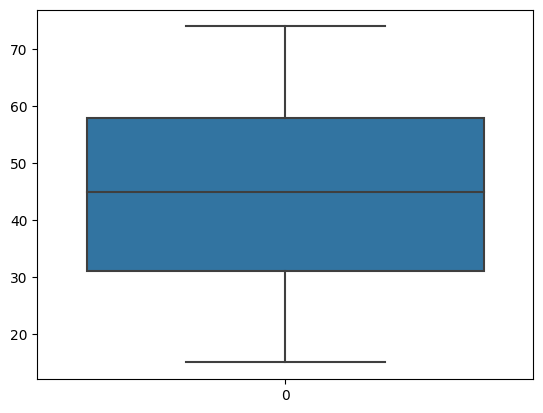

In [ ]:
sns.boxplot(df['Age'])

<Axes: >

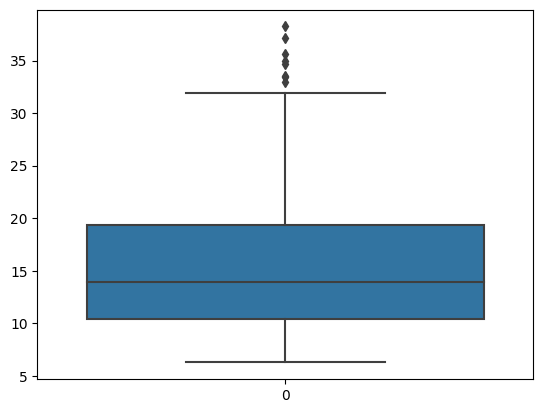

In [ ]:
sns.boxplot(df['Na_to_K'])

<Axes: >

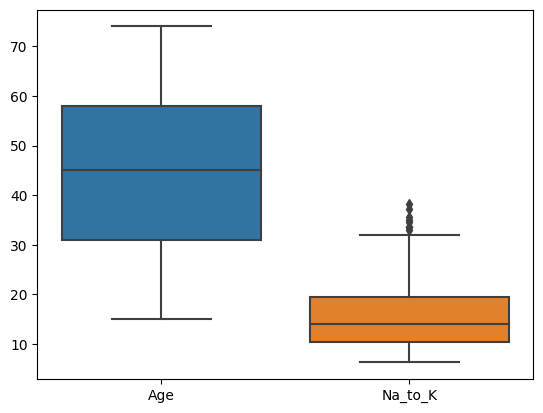

In [ ]:
sns.boxplot(df)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df['Drug'].unique()


array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()

In [ ]:
df['Drug']=le.fit_transform(df['Drug'])
df['Sex']=le.fit_transform(df['Sex'])
df['BP']=le.fit_transform(df['BP'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
x = pd.get_dummies(df.iloc[:,0:5]).values


In [ ]:
y = df.iloc[:,5:].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((160, 5), (40, 5), (160, 1), (40, 1))

In [ ]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

***Task 2 Build an ANN Model(with input layes,min 3 hidden layers&output layer)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu',input_shape=(xtrain.shape[1],)))#input layer
model.add(Dense(32,activation='relu'))#1st hidden layer
model.add(Dense(26,activation='relu'))#2nd hidden layer
model.add(Dense(16,activation='relu'))#3rd hidden layer
model.add(Dense(5,activation='softmax'))#Output layer

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 8)                 48        
                                                                 
 dense_56 (Dense)            (None, 32)                288       
                                                                 
 dense_57 (Dense)            (None, 26)                858       
                                                                 
 dense_58 (Dense)            (None, 16)                432       
                                                                 
 dense_59 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xtrain,ytrain,epochs=25,batch_size=5,verbose=1)

Epoch 1/25
32/32 [==============================] - 1s 1ms/step - loss: 1.5586 - accuracy: 0.3562 
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 1.4004 - accuracy: 0.4625
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 1.2144 - accuracy: 0.5312
Epoch 4/25
32/32 [==============================] - 0s 1ms/step - loss: 1.0287 - accuracy: 0.6562
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.8673 - accuracy: 0.7125
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.7495 - accuracy: 0.7125
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.7125
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.7188
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.7437
Epoch 10/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7937
Epoch 11/25
32/32 

In [ ]:
data=np.array([[47,1,1,0,13.093]])
ypred=model.predict(data)
pred_labels=le.inverse_transform(np.argmax(ypred,axis=1))
print("Predicted Drug Class:", pred_labels)

1/1 [==============================] - 0s 55ms/step
Predicted Drug Class: ['HIGH']
